In [1]:
import requests

In [ ]:
#ignore this cell

url = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=0E4P2P7Z0KKS0Y4L'
r = requests.get(url)
data = r.json()

print(data)

{'Information': 'We have detected your API key as 0E4P2P7Z0KKS0Y4L and our standard API rate limit is 25 requests per day. Please subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly remove all daily rate limits.'}


In [18]:
# API endpoint and parameters
url = "http://api.marketstack.com/v1/tickers/AAPL/eod"
params = {
    "access_key": "9b38e7dc7a52288ae2a9d9c9870987e5",  # Replace with your actual access key
    # "symbols": "GOOGL"
}

# Make the API request
response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print(data)
else:
    print(f"Error: {response.status_code}, {response.json()}")

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 250}, 'data': {'name': 'Apple Inc', 'symbol': 'AAPL', 'has_intraday': False, 'has_eod': True, 'country': None, 'eod': [{'open': 211.25, 'high': 213.94, 'low': 209.58, 'close': 213.49, 'volume': 60034237.0, 'adj_high': 213.95, 'adj_low': 209.58, 'adj_close': 213.49, 'adj_open': 211.25, 'adj_volume': 60107582.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2025-03-14T00:00:00+0000'}, {'open': 215.94, 'high': 216.8394, 'low': 208.42, 'close': 209.68, 'volume': 60306872.0, 'adj_high': 216.8394, 'adj_low': 208.42, 'adj_close': 209.68, 'adj_open': 215.95, 'adj_volume': 61368330.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2025-03-13T00:00:00+0000'}, {'open': 220.14, 'high': 221.75, 'low': 214.91, 'close': 216.98, 'volume': 62466400.0, 'adj_high': 221.75, 'adj_low': 214.91, 'adj_close': 216.98, 'adj_open': 220.14, 'adj_volume': 62547467.0, 'split

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 100}, 'data': [{'open': 211.25, 'high': 213.94, 'low': 209.58, 'close': 213.49, 'volume': 60034237.0, 'adj_high': 213.95, 'adj_low': 209.58, 'adj_close': 213.49, 'adj_open': 211.25, 'adj_volume': 60107582.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2025-03-14T00:00:00+0000'}, {'open': 215.94, 'high': 216.8394, 'low': 208.42, 'close': 209.68, 'volume': 60306872.0, 'adj_high': 216.8394, 'adj_low': 208.42, 'adj_close': 209.68, 'adj_open': 215.95, 'adj_volume': 61368330.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2025-03-13T00:00:00+0000'}, {'open': 220.14, 'high': 221.75, 'low': 214.91, 'close': 216.98, 'volume': 62466400.0, 'adj_high': 221.75, 'adj_low': 214.91, 'adj_close': 216.98, 'adj_open': 220.14, 'adj_volume': 62547467.0, 'split_factor': 1.0, 'dividend': 0.0, 'symbol': 'AAPL', 'exchange': 'XNAS', 'date': '2025-03-12T00:00:00+0000'

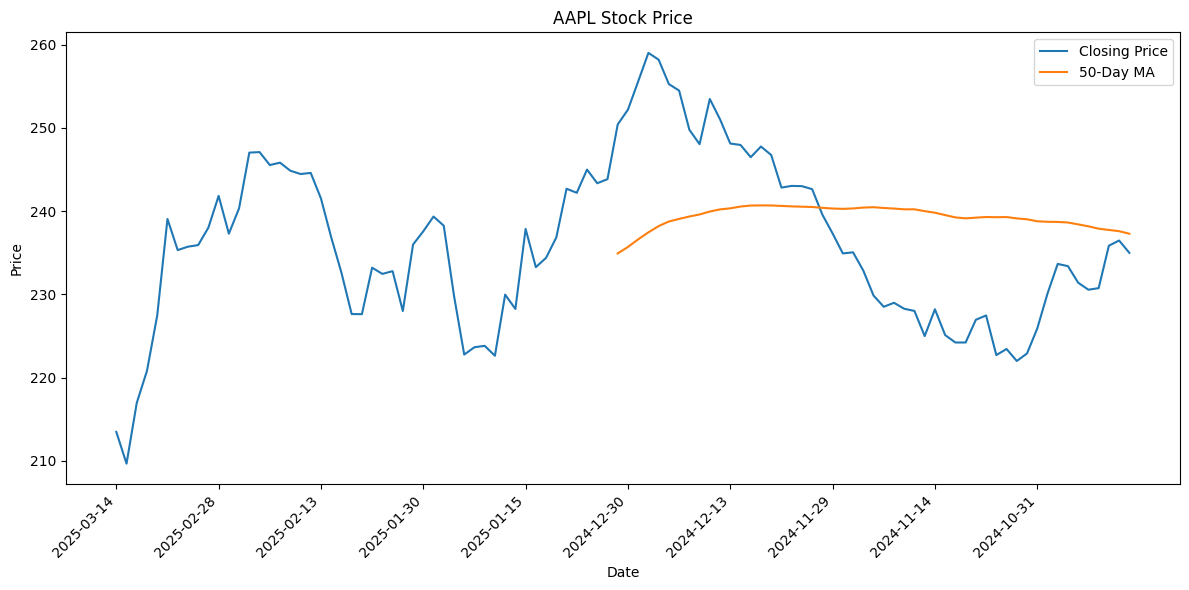

In [13]:
def process_stock_data(api_response):
    """
    Processes the API response and extracts stock data.

    Args:
        api_response (dict or str): The API response, either as a dictionary or a JSON string.

    Returns:
        list: A list of dictionaries, where each dictionary represents a day's stock data.
    """
    try:
        # If the response is a string, parse it as JSON
        if isinstance(api_response, str):
            data = json.loads(api_response)
            print(data)
        else:
            data = api_response  # Assume it's already a dictionary
            print(data)

        return data["data"]
    except (json.JSONDecodeError, KeyError, TypeError) as e:
        print(f"Error processing API response: {e}")
        return []
    
def calculate_moving_average(data, window):
    """
    Calculates the moving average of the closing prices.

    Args:
        data (list): A list of dictionaries, where each dictionary represents a day's stock data.
        window (int): The moving average window.

    Returns:
        list: A list of moving average values.
    """
    closing_prices = [day["close"] for day in data]
    moving_averages = []
    for i in range(len(closing_prices) - window + 1):
        window_prices = closing_prices[i:i + window]
        average = sum(window_prices) / window
        moving_averages.append(average)
    return moving_averages

def plot_stock_data(data, moving_average_50=None, moving_average_200=None):
    """
    Plots the stock data and moving averages.

    Args:
        data (list): A list of dictionaries, where each dictionary represents a day's stock data.
        moving_average_50 (list, optional): A list of 50-day moving average values. Defaults to None.
        moving_average_200 (list, optional): A list of 200-day moving average values. Defaults to None.
    """
    dates = [day["date"][:10] for day in data]  # Extract date part
    closing_prices = [day["close"] for day in data]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, closing_prices, label="Closing Price")

    if moving_average_50:
        ma_50_dates = dates[49:] #adjust dates to match the ma length
        plt.plot(ma_50_dates, moving_average_50, label="50-Day MA")
    if moving_average_200:
        ma_200_dates = dates[199:] #adjust dates to match the ma length
        plt.plot(ma_200_dates, moving_average_200, label="200-Day MA")

    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.title("AAPL Stock Price")
    plt.xticks(dates[::10], rotation=45, ha='right') #show every 10th date
    plt.legend()
    plt.tight_layout()
    plt.show()

# # Example usage (replace with your actual API response):
# api_response = """

# """ #shortened for testing purposes.

api_response = data

stock_data = process_stock_data(api_response)

if stock_data:
    ma_50 = calculate_moving_average(stock_data, 50)
    ma_200 = calculate_moving_average(stock_data, 200)
    plot_stock_data(stock_data, ma_50, ma_200)

the above code is for eod date and it is updated daily

In [5]:

# for greater simplicity install our package
# https://github.com/twelvedata/twelvedata-python

import requests

STOCK_CODE = "AAPL"

response = requests.get(f"https://api.twelvedata.com/time_series?apikey=d1b4c902740849cebfe6d9a88b253800&interval=1min&symbol={STOCK_CODE}&type=stock&dp=2")

print(response.text)
    

{"meta":{"symbol":"AAPL","interval":"1min","currency":"USD","exchange_timezone":"America/New_York","exchange":"NASDAQ","mic_code":"XNGS","type":"Common Stock"},"values":[{"datetime":"2025-03-14 15:59:00","open":"213.63","high":"213.66","low":"213.26","close":"213.38","volume":"1848333"},{"datetime":"2025-03-14 15:58:00","open":"213.62","high":"213.70","low":"213.59","close":"213.63","volume":"364561"},{"datetime":"2025-03-14 15:57:00","open":"213.67","high":"213.76","low":"213.55","close":"213.62","volume":"428749"},{"datetime":"2025-03-14 15:56:00","open":"213.57","high":"213.81","low":"213.51","close":"213.67","volume":"349836"},{"datetime":"2025-03-14 15:55:00","open":"213.58","high":"213.85","low":"213.49","close":"213.58","volume":"432851"},{"datetime":"2025-03-14 15:54:00","open":"213.12","high":"213.90","low":"213.10","close":"213.58","volume":"508316"},{"datetime":"2025-03-14 15:53:00","open":"213.08","high":"213.11","low":"212.90","close":"213.11","volume":"121194"},{"datetime